In [5]:
from __future__ import division

import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt, pi
%matplotlib inline
# %config InlineBackend.figure_format = 'retina'

import astropy.units as u
from astropy.constants import G

import gary.potential as sp
from gary.units import galactic
G = G.decompose(galactic).value

In [6]:
p = sp.LM10Potential()
grid = np.linspace(-25, 25, 200)

In [7]:
w0 = np.array([8.16404579e+00,   2.48664530e-01,   1.69572143e+01, -5.82228537e-02,  -1.02029826e-01,  -3.32834720e-03])
t, w = p.integrate_orbit(w0, dt=0.4, nsteps=12000)

In [8]:
R = np.sqrt(np.sum(w[:,0,:3]**2,axis=-1))

/Users/adrian/anaconda/lib/python2.7/site-packages/matplotlib/backends/backend_pdf.py:2264: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  different = bool(ours != theirs)


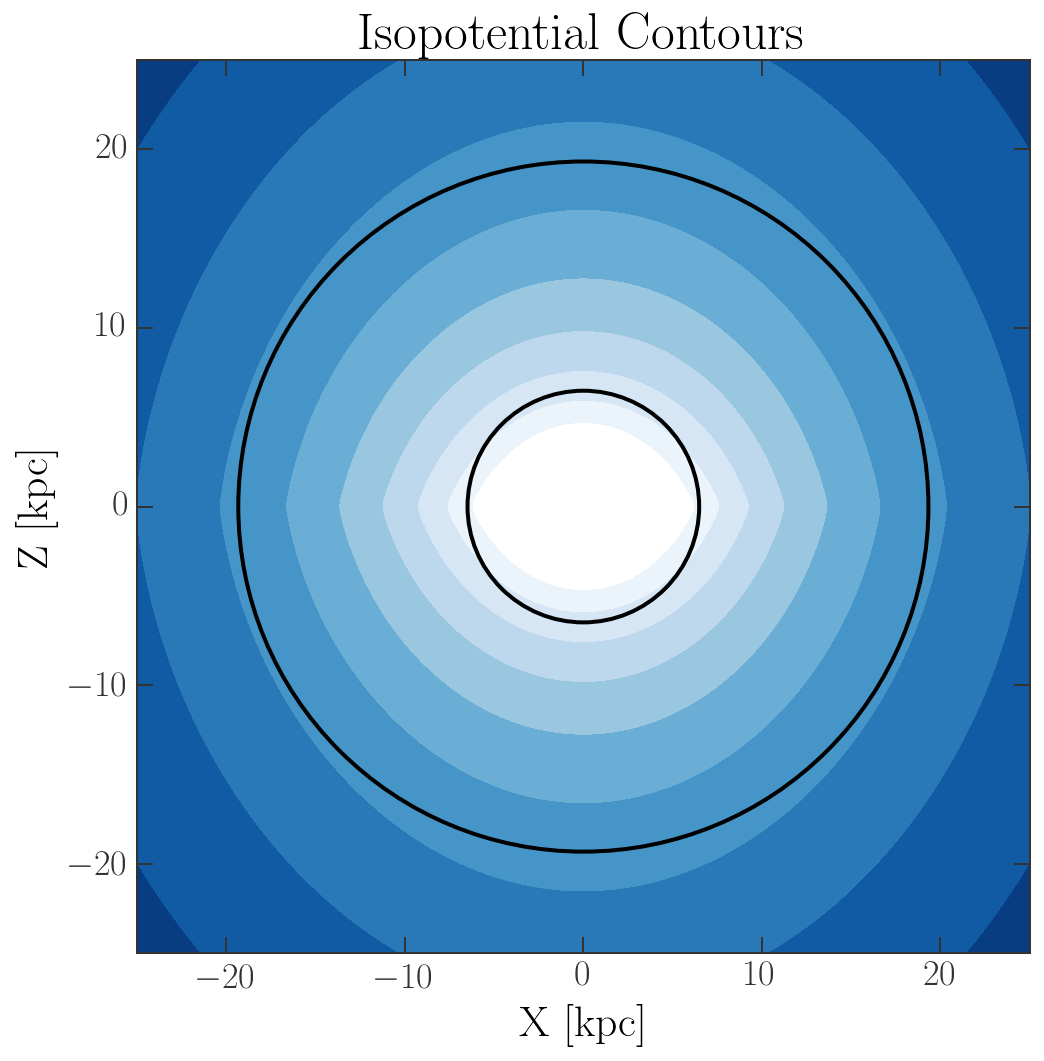

In [9]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
p.plot_contours(grid=(grid, 0., grid), ax=ax, 
                levels=np.linspace(0.01,0.1,10))
#                levels=np.logspace(-3,-1,20))
# ax.plot(w[:,0,0], w[:,0,2], marker=None, alpha=0.3)

for r in [R.min(), R.max()]: # range(5,25+5,5):
    ax.add_artist(plt.Circle((0,0), radius=r, facecolor='none', edgecolor='k', linewidth=2.))
    
ax.set_xlabel("X [kpc]")
ax.set_ylabel("Z [kpc]")
ax.set_title("Isopotential Contours")

In [10]:
C1 = (np.cos(97*u.deg)**2/1.38**2 + np.sin(97*u.deg)**2/1.**2).value
C2 = (np.sin(97*u.deg)**2/1.38**2 + np.cos(97*u.deg)**2/1.**2).value
C3 = (2*np.sin(97*u.deg)*np.cos(97*u.deg)*(1/1.38**2 - 1)).value
v_h = p.parameters['halo']['v_c']/np.sqrt(2)
r_h = 12.
q_z = p.parameters['halo']['q3']

M_B = p.parameters['bulge']['m']
c = p.parameters['bulge']['c']

M_D = p.parameters['disk']['m']
a = p.parameters['disk']['a']
b = p.parameters['disk']['b']

In [11]:
def lm10_density(x, y, z):
    return 2*C1*v_h**2/(C1*x**2 + C2*y**2 + C3*x*y + r_h**2 + z**2/q_z**2) + 2*C2*v_h**2/(C1*x**2 + C2*y**2 + C3*x*y + r_h**2 + z**2/q_z**2) - G*M_B*x**2/((c + sqrt(x**2 + y**2 + z**2))**2*(x**2 + y**2 + z**2)**(3/2)) - 2*G*M_B*x**2/((c + sqrt(x**2 + y**2 + z**2))**3*(x**2 + y**2 + z**2)) - G*M_B*y**2/((c + sqrt(x**2 + y**2 + z**2))**2*(x**2 + y**2 + z**2)**(3/2)) - 2*G*M_B*y**2/((c + sqrt(x**2 + y**2 + z**2))**3*(x**2 + y**2 + z**2)) - G*M_B*z**2/((c + sqrt(x**2 + y**2 + z**2))**2*(x**2 + y**2 + z**2)**(3/2)) - 2*G*M_B*z**2/((c + sqrt(x**2 + y**2 + z**2))**3*(x**2 + y**2 + z**2)) + 3*G*M_B/((c + sqrt(x**2 + y**2 + z**2))**2*sqrt(x**2 + y**2 + z**2)) - 3*G*M_D*x**2/(x**2 + y**2 + (a + sqrt(b**2 + z**2))**2)**(5/2) - 3*G*M_D*y**2/(x**2 + y**2 + (a + sqrt(b**2 + z**2))**2)**(5/2) - 3*G*M_D*z**2*(a + sqrt(b**2 + z**2))**2/((b**2 + z**2)*(x**2 + y**2 + (a + sqrt(b**2 + z**2))**2)**(5/2)) - G*M_D*z**2*(a + sqrt(b**2 + z**2))/((b**2 + z**2)**(3/2)*(x**2 + y**2 + (a + sqrt(b**2 + z**2))**2)**(3/2)) + G*M_D*z**2/((b**2 + z**2)*(x**2 + y**2 + (a + sqrt(b**2 + z**2))**2)**(3/2)) + G*M_D*(a + sqrt(b**2 + z**2))/(sqrt(b**2 + z**2)*(x**2 + y**2 + (a + sqrt(b**2 + z**2))**2)**(3/2)) + 2*G*M_D/(x**2 + y**2 + (a + sqrt(b**2 + z**2))**2)**(3/2) - v_h**2*(2*C1*x + C3*y)**2/(C1*x**2 + C2*y**2 + C3*x*y + r_h**2 + z**2/q_z**2)**2 - v_h**2*(2*C2*y + C3*x)**2/(C1*x**2 + C2*y**2 + C3*x*y + r_h**2 + z**2/q_z**2)**2 + 2*v_h**2/(q_z**2*(C1*x**2 + C2*y**2 + C3*x*y + r_h**2 + z**2/q_z**2)) - 4*v_h**2*z**2/(q_z**4*(C1*x**2 + C2*y**2 + C3*x*y + r_h**2 + z**2/q_z**2)**2)

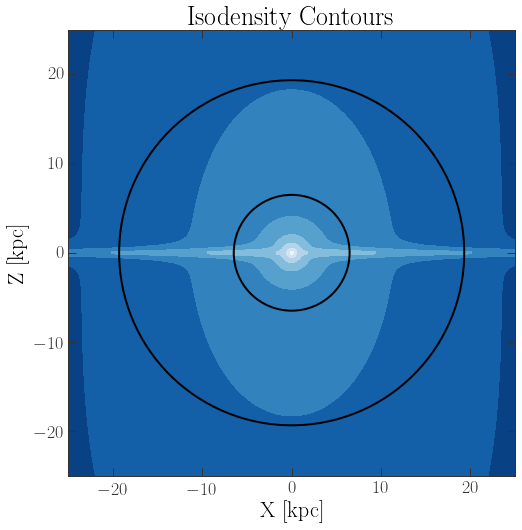

In [12]:
x,z = map(np.ravel, np.meshgrid(grid,grid))
y = np.zeros_like(x)
rho = lm10_density(x,y,z) / (4*np.pi*G)

fig,ax = plt.subplots(1,1,figsize=(8,8))
ax.contourf(x.reshape(len(grid),len(grid)), z.reshape(len(grid),len(grid)), 
            np.log10(rho).reshape(len(grid),len(grid)), cmap='Blues_r')

for r in [R.min(), R.max()]: # range(5,25+5,5):
    ax.add_artist(plt.Circle((0,0), radius=r, facecolor='none', edgecolor='k', linewidth=2.))

ax.set_xlabel("X [kpc]")
ax.set_ylabel("Z [kpc]")
ax.set_title("Isodensity Contours")

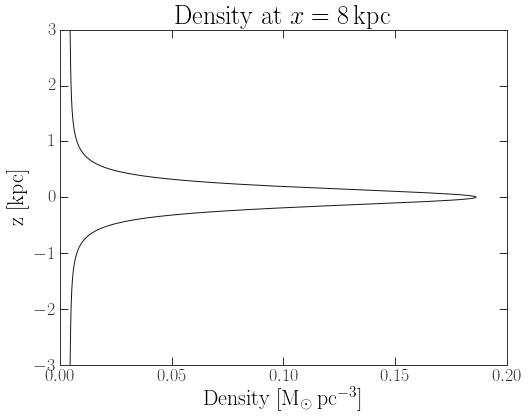

In [13]:
zz = np.linspace(-3,3,500)
dens = (lm10_density(8,0,zz) / (4*np.pi*G)*u.Msun/u.kpc**3).to(u.Msun/u.pc**3).value

plt.figure(figsize=(8,6))
plt.title(r"Density at $x = 8\,{\rm kpc}$")
plt.plot(dens, zz, marker=None)
plt.xlabel(r"Density [${\rm M}_\odot \,{\rm pc}^{-3}$]")
plt.ylabel("z [kpc]")

In [14]:
def mn_density(x,y,z,a,b,M):
    f = b*b*M / 4 / np.pi
    R2 = x**2 + y**2
    sqzb = np.sqrt(z**2+b**2)
    numer = a*R2 + (a + 3*sqzb)*(a + sqzb)**2
    denom = (R2 + (a + sqzb)**2)**(5/2.) * sqzb**3
    return f * numer/denom

def h_density(x,y,z,c,M):
    r = np.sqrt(x**2 + y**2 + z**2)
    return M*a / (2*np.pi*r*(r+a)**3)

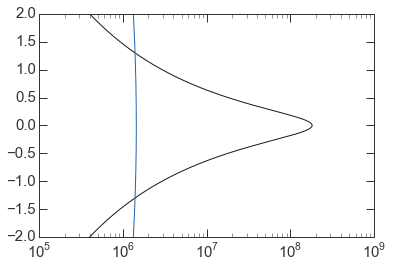

In [169]:
plt.semilogx(mn_density(8,0,zz,a=a,b=b,M=M_D), zz, marker=None)
plt.semilogx(h_density(8,0,zz,c=c,M=M_B), zz, marker=None)